<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [1]:
# YOUR CODE HERE
import pandas as pd
past = pd.read_csv('../dat/past.csv.gz')

past.columns


Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')

<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

In [2]:
past.sample(3)

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
2464,5895451,5.889800e+08,1.00000,1.000000,0.000000,9.830000,9.830000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0,0.000000,1.000000
429,5703173,5.388043e+08,2.00000,2.000000,251952.000000,1.430000,1.430000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,1.000000
1502,5738964,5.581039e+08,1.83871,1.258065,93984.645161,4.932903,4.932903,0.354839,1.193548,0.129032,...,0.225806,0.193548,0.129032,0.129032,0.258065,0.129032,0.032258,1,0.129032,1.096774


2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the perspective of classification, is the data balanced?

In [3]:
# YOUR CODE HERE
past['Purchased?'].mean()

0.3438

About 34% of the interactions resulted in a purchase. Most other times (~66% of the time), no purchase was made. This suggests that the data is imbalanced. 

3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [4]:
# YOUR CODE HERE
# YOUR CODE HERE
X = past.drop(columns=['user_id', 'product_id'])
y = X.pop('Purchased?')

In [7]:
y.value_counts()

0    3281
1    1719
Name: Purchased?, dtype: int64

In [8]:
display(X.shape)
display(y.shape)

(5000, 34)

(5000,)

In [9]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

In [10]:
# YOUR CODE HERE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=5, random_state=0, whiten=True)

X_reduced = pca.fit_transform(X_scaled)

<i/>think about data leakage when performing pca for all data performing splitting.

In [11]:
assert X_reduced.shape == (5000, 5)

5. Print out the percentage of variance explained by each of the selected components.

In [12]:
# YOUR CODE HERE
print(pca.explained_variance_ratio_) 
print(pca.singular_values_)

[0.10282299 0.09445816 0.06513061 0.05112375 0.04251041]
[130.25280274 124.84228478 103.66557061  91.84453442  83.75092836]


Explained variance is a statistical measure of how much variation in a dataset can be attributed to each of the principal components (eigenvectors) generated by the principal component analysis (PCA) method. In very basic terms, it refers to the amount of variability in a data set that can be attributed to each individual principal component. In other words, it tells us how much of the total variance is “explained” by each component. The larger the variance explained by a principal component, the more important that component is. 


6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [13]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [14]:
pd.DataFrame(y).sample(5)

,Purchased?
2165,0
2254,0
4764,1
4840,1
3240,1


In [15]:
pd.DataFrame(X_reduced).sample(5)

,0,1,2,3,4
1629,0.002692,-0.002310,-0.271887,-0.015337,-1.196968
2266,0.178327,-0.893347,-0.108738,-0.613397,-0.691710
4001,-0.180392,-0.723053,-0.301581,-0.276367,0.199692
4134,-1.392623,-0.646345,1.835785,1.880941,-1.219003
3146,-0.498978,0.208344,-0.068882,-0.532887,-0.030386


In [16]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

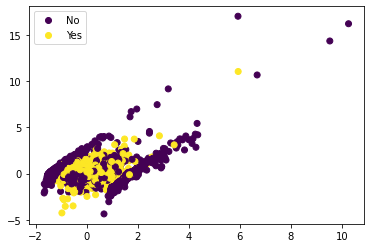

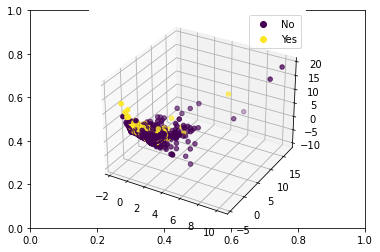

In [17]:
# YOUR CODE HERE
# YOUR CODE HERE
visualize_2pcs(X_reduced, y)

visualize_3pcs(X_reduced, y)

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( are the labels balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [18]:
# YOUR CODE HERE (imports!)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# from sklearn.metrics import (
#     confusion_matrix,
#     accuracy_score as accuracy,
#     recall_score as recall,
#     precision_score as precision,
#     f1_score
# )



def train(X, y, standardize = True) -> None:

    # YOUR CODE HERE
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

    if standardize == True:
        scaler = StandardScaler() 
        scaler.fit(X_train) 
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test) 
    
    if standardize == False:
        X_train = X_train
        X_test = X_test

    
    lr_model = LogisticRegression()

    lr_model = LogisticRegression(class_weight='balanced').fit(X_train,y_train)

    lr_pred = lr_model.predict(X_test)

    print(classification_report(y_test, lr_pred, target_names = ['Purchased? - No', 'Purchased? - Yes']))



    # print("accuracy:", accuracy(y_test, lr_pred))
    # print("precision:", precision(y_test, lr_pred))
    # print("recall:", recall(y_test, lr_pred))
    # print("f1 score:", f1_score(y_test, lr_pred))

Now apply the pipeline on the all the features `X` and review the performance

In [21]:
train(X, y, standardize = True) # with standardazing the input values

                  precision    recall  f1-score   support

 Purchased? - No       0.75      0.77      0.76       649
Purchased? - Yes       0.55      0.52      0.54       351

        accuracy                           0.68      1000
       macro avg       0.65      0.65      0.65      1000
    weighted avg       0.68      0.68      0.68      1000



In [22]:
train(X, y, standardize = False) # with standardazing the input values

                  precision    recall  f1-score   support

 Purchased? - No       0.98      0.40      0.57       649
Purchased? - Yes       0.47      0.99      0.64       351

        accuracy                           0.61      1000
       macro avg       0.73      0.70      0.61      1000
    weighted avg       0.81      0.61      0.60      1000



Expected output: <br>
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       649
           1       0.55      0.52      0.54       351

    accuracy                           0.68      1000 
   
   macro avg       0.65      0.65      0.65      1000

weighted avg       0.68      0.68      0.68      1000


Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

In [23]:
train(X_reduced, y)

                  precision    recall  f1-score   support

 Purchased? - No       0.74      0.70      0.72       649
Purchased? - Yes       0.49      0.54      0.51       351

        accuracy                           0.64      1000
       macro avg       0.61      0.62      0.62      1000
    weighted avg       0.65      0.64      0.65      1000



In [13]:
# YOUR CODE HERE

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       649
           1       0.49      0.54      0.51       351

    accuracy                           0.64      1000
   macro avg       0.61      0.62      0.62      1000
weighted avg       0.65      0.64      0.65      1000



8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 
    *YOUR ANSWER HERE*

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [24]:
# YOUR CODE HERE
from sklearn.cluster import KMeans

2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [25]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        # YOUR CODE HERE
        kmeans = KMeans(n_clusters=k, random_state=10).fit(X)
        # YOUR CODE HERE
        inertias.append(kmeans.inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

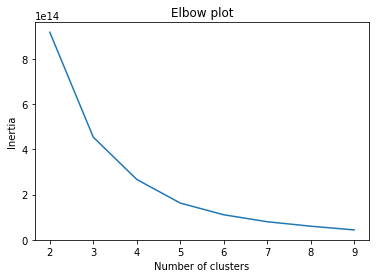

In [26]:
# YOUR CODE HERE
import numpy as np
ks = np.arange(2,10)
visualize_elbow(X, ks)

4. What are the disadvantage to use the Elbow method? 

*Answer*

To my understanding, the elbow method helps determine minimum number of clusters. However if the data clusters are closely spaced, they maybe clustered into one and that can lead to suggest one less cluster (in reality that may not be the case). Also, there could be no clear elbow.

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [27]:
from utils import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.19919967382453044
For n_clusters = 3 The average silhouette_score is : 0.21238428422148906
For n_clusters = 4 The average silhouette_score is : 0.21846259845030103
For n_clusters = 5 The average silhouette_score is : 0.20550166021116092
For n_clusters = 6 The average silhouette_score is : 0.20861307391519923
For n_clusters = 7 The average silhouette_score is : 0.2137422138377999
For n_clusters = 8 The average silhouette_score is : 0.21817268912132348


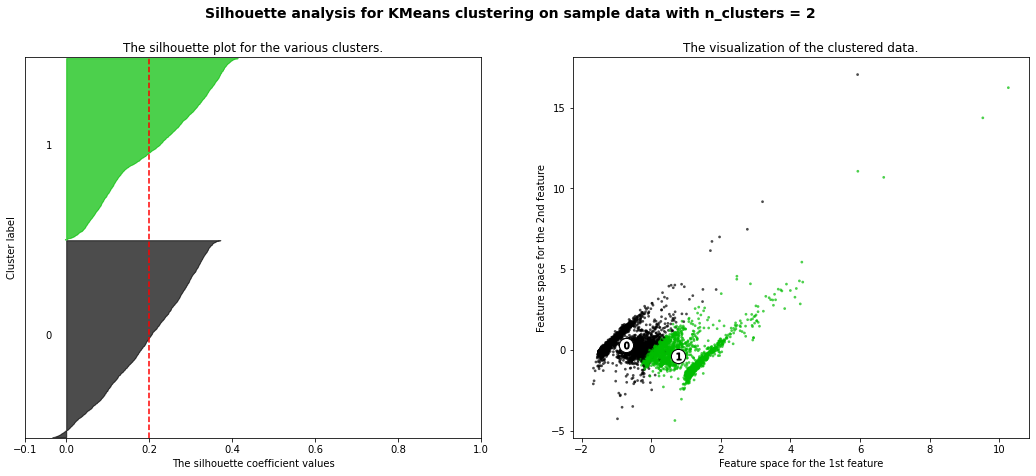

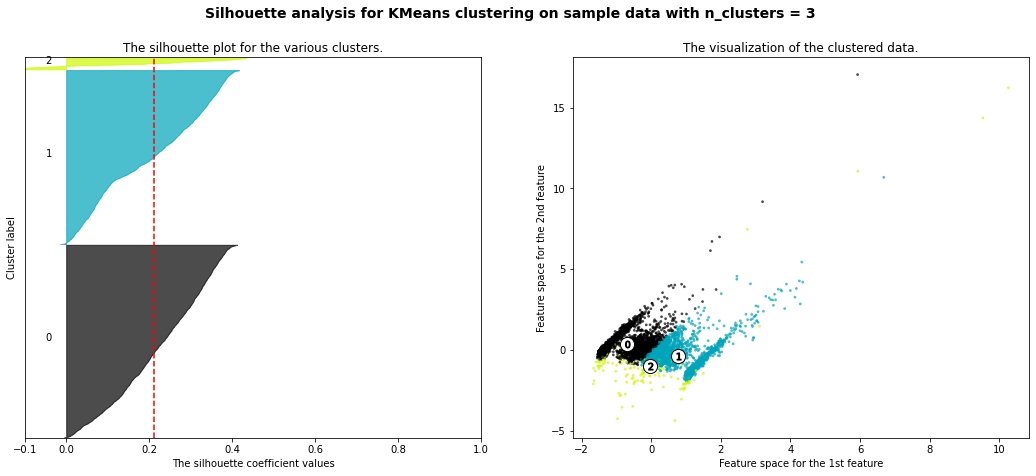

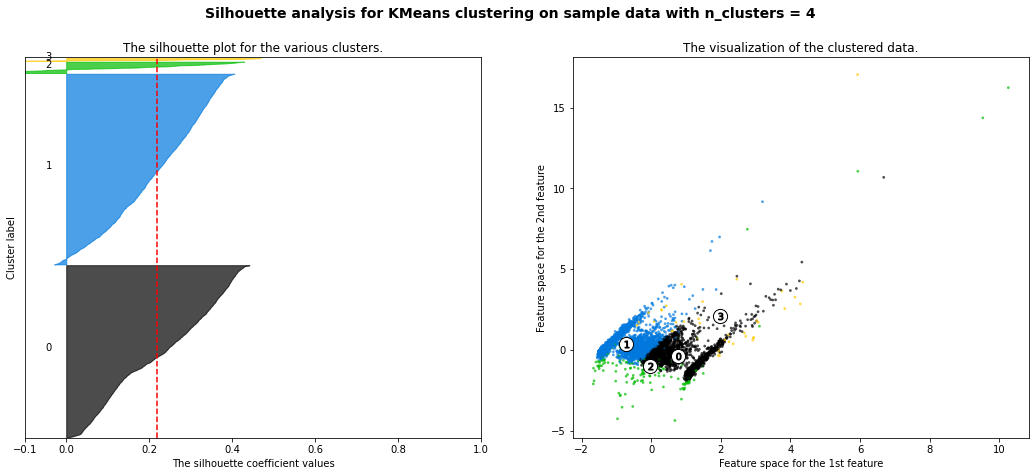

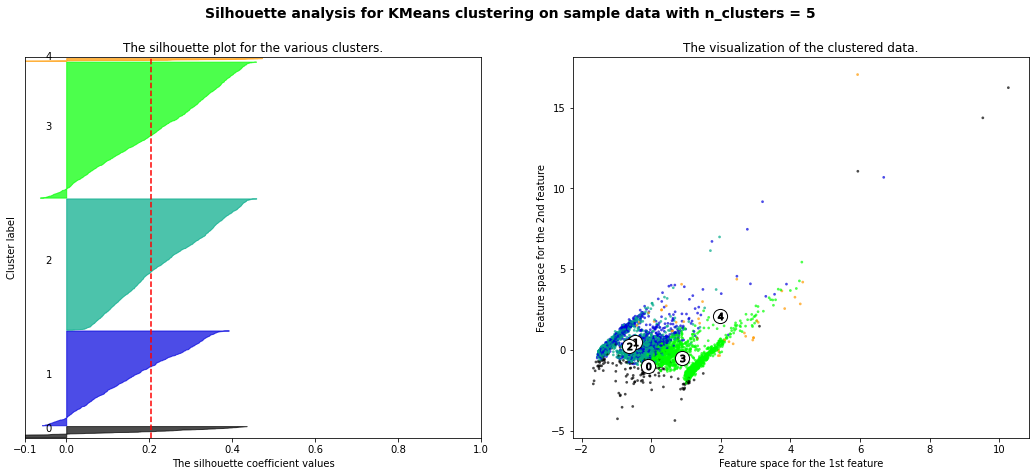

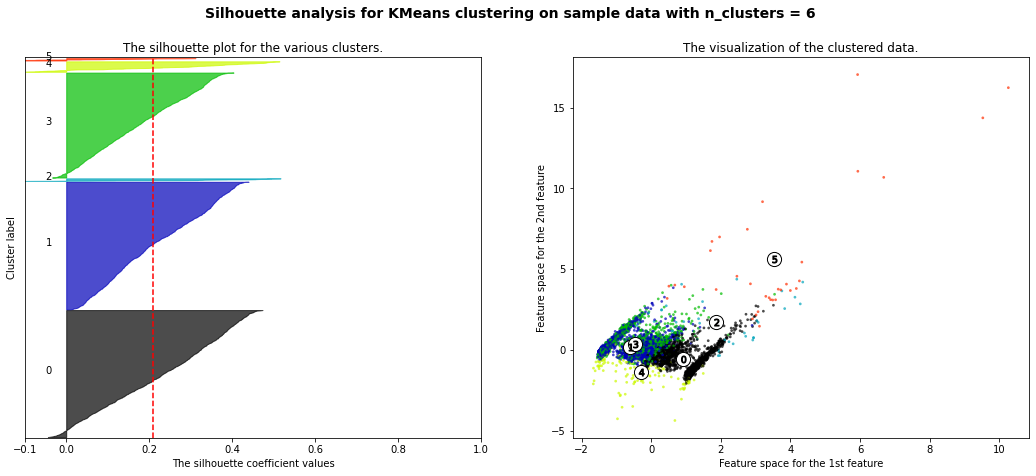

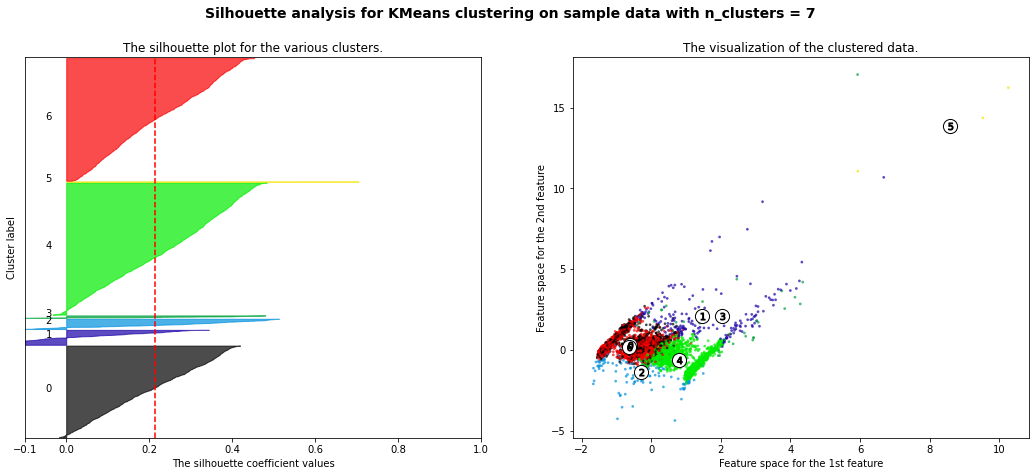

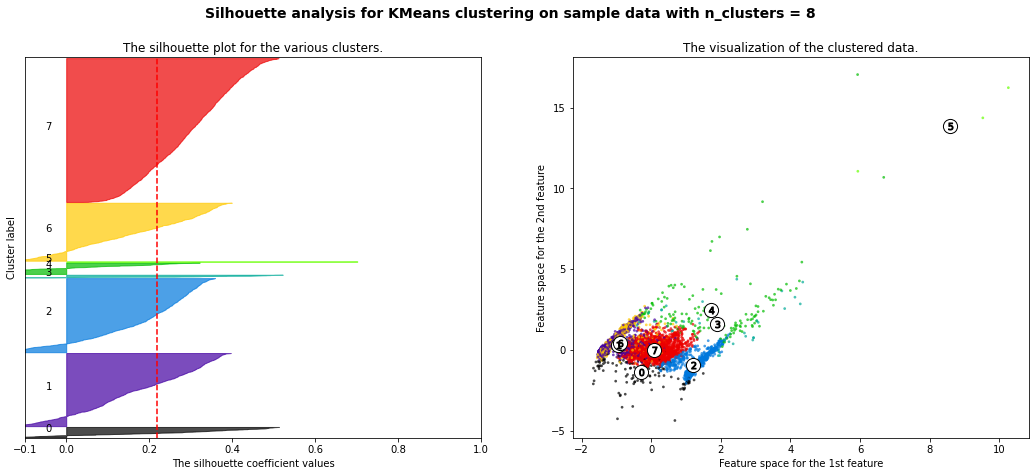

In [28]:
# YOUR CODE HERE
visualize_silhouette(8, X_reduced, random_state=10)

6. Instantiate a k-means model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [29]:
# YOUR CODE HERE
km = KMeans(4, random_state=10)
km.fit(X_reduced)

KMeans(n_clusters=4, random_state=10)

7. What is the size of each cluster? 

In [30]:
# YOUR CODE HERE
labels = km.labels_
counts = np.bincount(labels[labels>=0])
counts

array([2282, 2530,  150,   38])

8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [31]:
# YOUR CODE HERE
cluster_pca = pd.DataFrame(km.predict(X_reduced))
past['cluster_pcas'] = cluster_pca

In [88]:
past.sample(4)

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,cluster_pcas
1462,5843737,5.404545e+08,2.227273,1.272727,111086.909091,8.669091,8.669091,0.590909,1.181818,0.318182,...,0.136364,0.136364,0.181818,0.454545,0.090909,0.000000,1,0.0,0.954545,1
3486,5803900,4.838433e+08,2.000000,1.200000,194213.000000,3.970000,3.970000,0.600000,0.500000,0.900000,...,0.100000,0.100000,0.100000,0.200000,0.300000,0.100000,1,0.1,1.300000,1
1087,5790473,5.652507e+08,1.000000,1.000000,0.000000,6.633333,6.633333,0.333333,0.666667,0.000000,...,0.000000,0.000000,0.333333,0.333333,0.000000,0.333333,0,0.0,1.000000,1
2996,5480,4.591063e+08,1.909091,1.545455,162647.090909,4.440000,4.400000,0.545455,0.727273,0.636364,...,0.181818,0.181818,0.181818,0.454545,0.000000,0.000000,1,0.0,1.272727,1


In [76]:
past.columns

Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category', 'cluster_pcas'],
      dtype='object')

In [78]:
past_temp = past[['product_id', 
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Purchased?', 'cluster_pcas']]

In [80]:
past_temp = past_temp[past_temp['Purchased?']==1]

9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

In [86]:
past_temp.describe()

,product_id,Weekend,Fr,Mon,Sat,Sun,Thu,Tue,Wed,Purchased?,cluster_pcas
count,1.719000e+03,1719.0,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.0,1719.000000
mean,5.463511e+06,0.0,0.140895,0.145544,0.132402,0.128234,0.149480,0.149760,0.153686,1.0,0.599767
std,1.354686e+06,0.0,0.115043,0.120812,0.115501,0.113734,0.119487,0.123062,0.124159,0.0,0.564078
min,4.104000e+03,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,5.727538e+06,0.0,0.055556,0.062500,0.000000,0.000000,0.062500,0.066667,0.076923,1.0,0.000000
50%,5.815155e+06,0.0,0.142857,0.142857,0.121951,0.125000,0.142857,0.142857,0.142857,1.0,1.000000
75%,5.861336e+06,0.0,0.200000,0.200000,0.185513,0.181818,0.217787,0.212121,0.212444,1.0,1.000000
max,5.928771e+06,0.0,0.750000,0.800000,0.800000,0.750000,0.666667,0.750000,1.000000,1.0,3.000000


There is nearly an even distribution amoung days for which purchases were made (there doesn't seem to be any particular day where purchased condition is notably more than other days)

In [75]:
print('Average purchased vs ave interaction time for cluster 0: ',round(past[past['cluster_pcas']==0]['Purchased?'].mean(),3),'vs', round(past[past['cluster_pcas']==0]['interactionTime'].mean(),3))
print('Average purchased vs ave interaction time for cluster 1: ',round(past[past['cluster_pcas']==1]['Purchased?'].mean(),3),'vs', round(past[past['cluster_pcas']==1]['interactionTime'].mean(),3))
print('Average purchased vs ave interaction time for cluster 2: ',round(past[past['cluster_pcas']==2]['Purchased?'].mean(),3),'vs', round(past[past['cluster_pcas']==2]['interactionTime'].mean(),3))
print('Average purchased vs ave interaction time for cluster 3: ',round(past[past['cluster_pcas']==3]['Purchased?'].mean(),3),'vs', round(past[past['cluster_pcas']==3]['interactionTime'].mean(),3))


Average purchased vs ave interaction time for cluster 0:  0.33 vs 296925.745
Average purchased vs ave interaction time for cluster 1:  0.357 vs 195585.563
Average purchased vs ave interaction time for cluster 2:  0.407 vs 251886.605
Average purchased vs ave interaction time for cluster 3:  0.053 vs 918894.272


Consider removing any items that fall under cluster 3 since it doesn't result in much of purchase even though it has very high interaction time. But at the same time, does this interaction time leads to other items in other clusters and then a purchase? 

In [56]:
print('Average purchased vs ave min price for cluster 0: ',round(past[past['cluster_pcas']==0]['Purchased?'].mean(),3),'vs', round(past[past['cluster_pcas']==0]['minPrice'].mean(),3))
print('Average purchased vs ave min price for cluster 1: ',round(past[past['cluster_pcas']==1]['Purchased?'].mean(),3),'vs', round(past[past['cluster_pcas']==1]['minPrice'].mean(),3))
print('Average purchased vs ave min price for cluster 2: ',round(past[past['cluster_pcas']==2]['Purchased?'].mean(),3),'vs', round(past[past['cluster_pcas']==2]['minPrice'].mean(),3))
print('Average purchased vs ave min price for cluster 3: ',round(past[past['cluster_pcas']==3]['Purchased?'].mean(),3),'vs', round(past[past['cluster_pcas']==3]['minPrice'].mean(),3))


Average purchased vs ave min price for cluster 0:  0.33 vs 6.145
Average purchased vs ave min price for cluster 1:  0.357 vs 5.643
Average purchased vs ave min price for cluster 2:  0.407 vs 57.796
Average purchased vs ave min price for cluster 3:  0.053 vs 4.25


In [53]:
print('Average purchased vs ave max price for cluster 0: ',round(past[past['cluster_pcas']==0]['Purchased?'].mean(),3),'vs', round(past[past['cluster_pcas']==0]['maxPrice'].mean(),3))
print('Average purchased vs ave max price for cluster 1: ',round(past[past['cluster_pcas']==1]['Purchased?'].mean(),3),'vs', round(past[past['cluster_pcas']==1]['maxPrice'].mean(),3))
print('Average purchased vs ave max price for cluster 2: ',round(past[past['cluster_pcas']==2]['Purchased?'].mean(),3),'vs', round(past[past['cluster_pcas']==2]['maxPrice'].mean(),3))
print('Average purchased vs ave max price for cluster 3: ',round(past[past['cluster_pcas']==3]['Purchased?'].mean(),3),'vs', round(past[past['cluster_pcas']==3]['maxPrice'].mean(),3))


Average purchased vs ave max price for cluster 0:  0.33 vs 6.178
Average purchased vs ave max price for cluster 1:  0.357 vs 5.666
Average purchased vs ave max price for cluster 2:  0.407 vs 57.846
Average purchased vs ave max price for cluster 3:  0.053 vs 4.663


In [50]:
print('Average purchased vs number of times viewed in a journey for cluster 0: ',round(past[past['cluster_pcas']==0]['Purchased?'].mean(),3),'vs', round(past[past['cluster_pcas']==0]['NumView'].sum(),3))
print('Average purchased vs number of times viewed in a journey for cluster 1: ',round(past[past['cluster_pcas']==1]['Purchased?'].mean(),3),'vs', round(past[past['cluster_pcas']==1]['NumView'].sum(),3))
print('Average purchased vs number of times viewed in a journey for cluster 2: ',round(past[past['cluster_pcas']==2]['Purchased?'].mean(),3),'vs', round(past[past['cluster_pcas']==2]['NumView'].sum(),3))
print('Average purchased vs number of times viewed in a journey for cluster 3: ',round(past[past['cluster_pcas']==3]['Purchased?'].mean(),3),'vs', round(past[past['cluster_pcas']==3]['NumView'].sum(),3))


Average purchased vs number of times viewed in a journey for cluster 0:  0.33 vs 2006.329
Average purchased vs number of times viewed in a journey for cluster 1:  0.357 vs 2189.015
Average purchased vs number of times viewed in a journey for cluster 2:  0.407 vs 258.923
Average purchased vs number of times viewed in a journey for cluster 3:  0.053 vs 14.167


From above comparison (averaged purchased vs number of times viewed), it is interesting to see more purchased on average for Cluster 2 products even though the number of times viewed is much less than Clusters 0 and 1.

10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

Answers:
- Assumption of n groups of equal variance. 
- Kmeans is sensitive to scaling. 
- Kmeans needs to linear separability of the clusters. 
- Need to specify numbers of clusters. 

For our case above, k-means seems not to be a good approach because kmeans responds poorly to elongated clusters (in our case, we don't have circular, linearly separable data).

11. Jot down recommendations or followup steps, detailing the reasons.

- Consider doing an EDA before resorting to clustering. There doesn't seem to be a benefit of clustering for this exercise.
- Include categories of products (this may help with clustering). There does appear Category column in the data but there is no description found from either of the images uploaded under img folder.

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [89]:
# YOUR CODE HERE
new = pd.read_csv('../dat/new.csv.gz')

In [91]:
new.sample(4)

,product_id,maxPrice,minPrice,Purchased?,Category
25128,5889666,2.540000,1.693333,1,2.333333
12824,5704411,11.570000,11.570000,1,0.971429
5813,5912531,2.803333,2.803333,0,1.000000
20455,5733086,8.289286,8.289286,1,1.428571


In [92]:
new.shape

(30091, 5)

In [93]:
assert new.shape == (30091, 5)

In [94]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

    * - The number of datapoints in the training set (5000) is relatively small while the test set (30091) is quite large.*
    * - The training set has more features than in the test set.*

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [104]:
#intersect1d() function find the intersection of two arrays and return the sorted, unique values that are in both of the input arrays

In [103]:
np.intersect1d(new['product_id'], past['product_id'])

array([], dtype=int64)

In [116]:
common_products1 = new.product_id.isin(past.product_id)
common_products2 = past.product_id.isin(new.product_id)
print(common_products1.value_counts())
print(common_products2.value_counts())

False    30091
Name: product_id, dtype: int64
False    5000
Name: product_id, dtype: int64


*Using two methods (np.interest1d method and the isin method), no products ids were found that appear in both datasets.*

In [27]:
# YOUR CODE HERE

Number of product ids in both past and new data: 0


4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [121]:
print('Percentage of data points resulted in a purchase in the test set: ' ,round(100*new['Purchased?'].mean(),1),'%')

Percentage of data points resulted in a purchase in the test set:  34.4 %


In [ ]:
# YOUR CODE HERE # ~.344

5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [128]:
# YOUR CODE HERE
X_train = past[['maxPrice', 'minPrice', 'Category']]
y_train = past[['Purchased?']]

X_test = new[['maxPrice', 'minPrice', 'Category']]
y_test = new['Purchased?']

In [129]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5000, 3), (5000, 1), (30091, 3), (30091,))

In [137]:
 type(X_train)

pandas.core.frame.DataFrame

In [139]:
np.ndarray

numpy.ndarray

In [141]:
import numpy as np
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

AssertionError: 

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lr_model = LogisticRegression()
lr_model = LogisticRegression(class_weight='balanced').fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print(classification_report(y_test, lr_pred))


              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



/Users/deliaahmed/miniconda3/envs/py39_12/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
# YOUR CODE HERE

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [149]:
# YOUR CODE HERE
X = np.concatenate((X_train, X_test))

In [150]:
X.shape

(35091, 3)

In [151]:
assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [181]:
y_temp = y_test.replace([0,1],-1)

y = pd.concat([y_train, pd.DataFrame(y_temp)], axis=0)

In [184]:
y.iloc[4995:5005]

,Purchased?
4995,0
4996,1
4997,0
4998,0
4999,0
0,-1
1,-1
2,-1
3,-1
4,-1


In [34]:
# YOUR CODE HERE

In [185]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [189]:
import numpy as np
from sklearn import datasets
from sklearn.semi_supervised import LabelSpreading
label_spreading_model = LabelSpreading(kernel='knn', alpha=0.01)
label_spreading_model.fit(X,y.values.ravel())


LabelSpreading(alpha=0.01, kernel='knn')

In [36]:
# YOUR CODE HERE

LabelSpreading(alpha=0.01, kernel='knn')

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [196]:
semi_sup_preds = label_spreading_model.transduction_[5000:]

In [197]:
len(semi_sup_preds)

30091

In [199]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

10. Print the classification report

In [200]:
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

              precision    recall  f1-score   support

           0       0.84      0.93      0.89     19732
           1       0.84      0.67      0.75     10359

    accuracy                           0.84     30091
   macro avg       0.84      0.80      0.82     30091
weighted avg       0.84      0.84      0.84     30091



Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [202]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



- f1-scores and accuracy-wise, semi-supervised learning is better than the supervised learning
- Need to explore further, why new/old data with very few features can be used to draw any substantive conclusions
- The only meaningful info is probably the category column (not sure how max and min prices can helpful)

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)